**LGMVIP - Data Science Intern, September-2022**

**AUTHOR Name - Shaikh Zainab**

**01 BEGINNER LEVEL task**

**3)Music Recommendation:**

Music recommender systems can suggest songs to users based on their listening patterns.


**Importing The Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Reading The Dataset**

In [ ]:
ntr = 7000
nts = 3000
data_path = r"/content/drive/MyDrive/Colab Notebooks/Lets Grow More Dataset/train.csv"
train = pd.read_csv(data_path,nrows=ntr)
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test1 = pd.read_csv(data_path,names=names,skiprows=ntr,nrows=nts)
songs = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Lets Grow More Dataset/songs.csv")
members = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Lets Grow More Dataset/members.csv")

**Train dataset**

In [ ]:
train.head(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,my library,Local playlist more,local-library,1


In [ ]:
train.sample(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
5572,tqAn7duo3dSxNkG84T15HQFluTqXQwS/EYqIYu0CP3U=,+/YtSsv1Gg47x3BC6OLRdHzQvi9ZndPmmN0MNAPaqRI=,discover,NaN,song-based-playlist,0
6169,s4akfXF0PdkG8sibtldCHl85ktvYyrPRYPlETS1EKtc=,1tsAVPMuYf7+vR/K5G2byE2e5xz+A5ehbn9OsCDe2LQ=,radio,Radio,radio,0
1014,SwW49bLEz3/3hR7xkRYNYKRs3WzCw+KlzloRgBPpxII=,zg6SzD3aqsnOqqyhFYTdbCNFrhSACbwefB/ZFi68AO0=,my library,Local playlist more,local-library,1
5840,HgdDb4K3rmupDT/YejxhLXrMpHJhi04SbuPPq0GPT2A=,T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=,my library,Local playlist more,local-library,1
4238,hPn6PsLoyOC5xiXzK2PlsRL02GkVAc73d0F54KoBs0A=,qJAdxc85AGKaB2ToD78NJOzBxIII7sim4DMrZpBKElc=,my library,Local playlist more,local-library,1
5298,0h3Rz9yBPUAchbjhjncZMU4lz7IPyfSvwuAc0C5XwtE=,Qp6RH2zIWkLcDrRcl8tz/PMLoImkOj6TXJ4Jlj8bVas=,my library,Local playlist more,local-library,1
870,+4xaTltGXsNattBO89s5blOroev2V5i1M1kP0ZJpkyA=,mZcB03DbF/QTVPEhGqBKqcKRHTUtmJsHbkv9XJGTP1s=,my library,Local playlist more,local-library,1
132,XIpjLNs4f/OHphnrSPoNmsrd45Al8pL0v74FgzDZHnQ=,8OsXpp32oqorzAN4NNkVouaV0I81ddPLZ8DxMRAGJdQ=,my library,Local playlist more,local-playlist,1
1182,Of1LniyWUa8yBvyxL0N0sU2rCMjXxtMJ+EOziqmb8BI=,gu/lHDjq6qqpU7r3CQkvRpGF9kqc2Mrn9CZhb7jrFvY=,my library,Local playlist more,local-playlist,1
1259,5DIIrcyTO3Hr/LY1QU/pOjLjRMgzUeNRa7sWtICi3GE=,wKLh2Y0nuHRxfXWVGWzICgkHPP2UKfWy2QTB7A5/pmo=,my library,Local playlist more,local-library,1


In [ ]:
train.shape

(7000, 6)

In [ ]:
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [ ]:
train.describe()

,target
count,7000.000000
mean,0.783429
std,0.411937
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   msno                7000 non-null   object
 1   song_id             7000 non-null   object
 2   source_system_tab   6986 non-null   object
 3   source_screen_name  6815 non-null   object
 4   source_type         6986 non-null   object
 5   target              7000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 328.2+ KB


In [ ]:
train.isnull().sum()

msno                    0
song_id                 0
source_system_tab      14
source_screen_name    185
source_type            14
target                  0
dtype: int64

**Songs datasets**

In [ ]:
songs.head(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793,465,光良 (Michael Wong),光良,彭資閔,3.0
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0


In [ ]:
songs.sample(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
1456602,BgTDKg2Yy0OSerBINqqcnUMZ+e7Dq7kyNsiVeLa1OGY=,215109,465,陳思思,颂今,NaN,52.0
1956863,fvMcsp3tECyayTOmb0vtFiwQkebgiGICCXmT0vh4IB4=,194873,798,Various Artists,R. Argent,R. Argent,52.0
1275794,zRh5WZ1eUp+/pTuo/H5/DRj9pzxJYZNLLG00mc/+3YI=,212416,1609,Psy'Aviah,NaN,NaN,-1.0
2023267,l7U1UXloUS+oQR0aCCVJ7ANTzCLx1SI2QX4vr5ZAZH8=,286302,1152,Yungchen Lhamo,NaN,NaN,-1.0
1139592,wYPCFrhTvqJ+p6G1fm4nN44rsbaeHPPIOboUHp47cec=,245133,388|1152,Chill Every Night Club,Marco Rinaldo,NaN,52.0
1657866,Ba5+K9JWqAMZ7OFj42m6LcHsTetNma3yOqEK/LNauSI=,283689,2157,黃妃,方文良,十方,10.0
1566084,x2FAzaU0ZLubms+dpS6gKTyyhJtRIVpAXJb//WqRsm0=,132702,NaN,Exam Study Classical Music Chill Out| Exam Stu...,Johannes Brahms,NaN,-1.0
998104,zYp3rLSXisgwkHoo3qw89YgklrPn4KCzedyvoAqba60=,41352,388,Calm Music Zone,Sacchetto G.,NaN,-1.0
1491816,UOyK6nMGyfebHDqxiileQj3DQ5cl/PiKZcSGTPO0OYw=,314652,2122,Leonard Cohen,李歐納孔,李歐納孔,-1.0
1688098,IUb7rqYYaht57dweXELB6adBufDUbdXjU8RsG0gL/1M=,238840,465,The Very Best,NaN,NaN,52.0


In [ ]:
songs.shape

(2296320, 7)

In [ ]:
songs.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [ ]:
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [ ]:
songs.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

**Members dataset**






In [ ]:
members.head(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,43,female,9,20120703,20171006
6,Sw9AT8QoR4wWiNUqHZUH6g5ahzGUx4lo1g+Y3xE2f2M=,1,0,NaN,4,20160326,20160329
7,pg6bT2XZkSP1TDBy4qn3HBPY/HffKQ/bg8WIISQYBSY=,1,0,NaN,7,20160130,20170930
8,kfk1AdTNH2dNqF5LzIs4e0vwGPejw2jrnFjJlcYnEgk=,1,0,NaN,7,20110111,20170930
9,tscijwx4dbEp0NXGl+iFtHJ8zrj+TkcMrduOQk9t+gE=,1,0,NaN,7,20160217,20170613


In [ ]:
members.sample(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
15286,jjeuIvuJKxDrB0VJ8xO0rXN65H7VTPwyemUCMwcE/A8=,1,0,NaN,4,20170222,20170225
6396,kTEFZVHBPzUDt2bGcxKY9KKGzOwZBt2pdDcN+eRymrI=,16,28,male,9,20111010,20170930
5938,ntwa/q4XfckMJHUoFci75WN7lAfG0QpCBdZqgu+TLKc=,13,29,female,9,20111119,20170910
32261,L8m0boopqQXCJ54rwtmsbM2+bJ8S+4PYgFxNXpYs0QQ=,5,31,male,3,20150530,20170516
27443,QYWx2LrXWASOROO4nr8wYtLi6UdQ3nRrqniGJT9kCZQ=,1,0,NaN,4,20160908,20160911
13112,zBlHVNq1Hqs2mZ8Pcp5g8jJAZv0RSVH0WtqvHZm0Lyc=,1,0,NaN,4,20161226,20161229
3913,vKFLRCvickoFcCoGgv5BT/kuH/XWqofuTm9JWkaFybM=,12,35,male,3,20130813,20170920
29654,kyxgQqgaVN3W+tfhEFgXk1WiKRNS9srYwPaAv9hYtYw=,1,0,NaN,7,20130526,20170910
11881,velb1f/ppgdKuCssef5g3tKWzQV3mTq8z7uYVuSDk/Y=,1,0,NaN,7,20120526,20170930
20052,j1KaZLiODCQEFLiRUoQ06vd1QIjTIO5HCgH8nW/MWSE=,1,0,NaN,4,20170109,20170112


In [ ]:
members.shape

(34403, 7)

In [ ]:
members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [ ]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [ ]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [ ]:
members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

**Data Visualization**

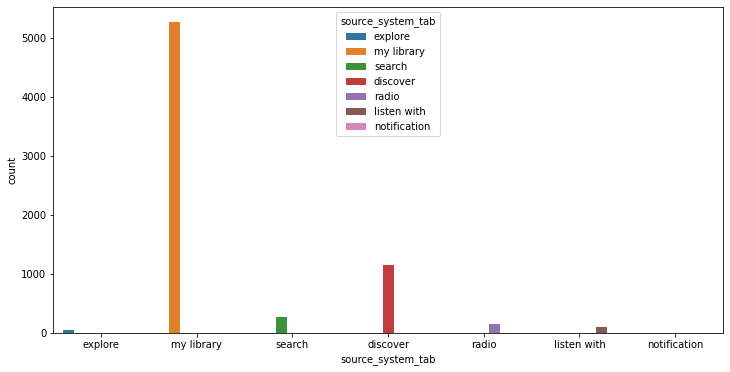

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_system_tab'],hue=train['source_system_tab'])

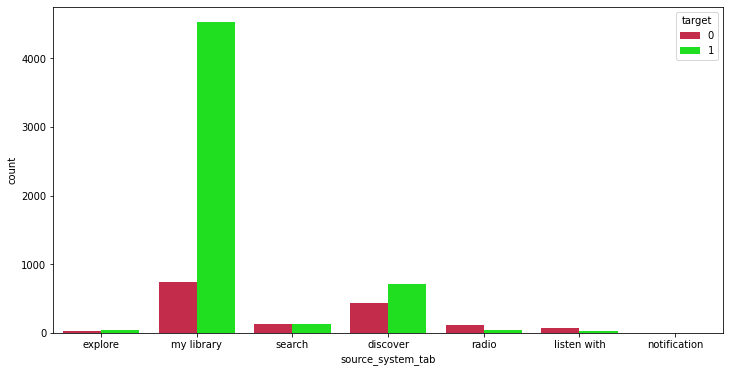

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_system_tab'],palette=['crimson','lime'],hue=train['target'])

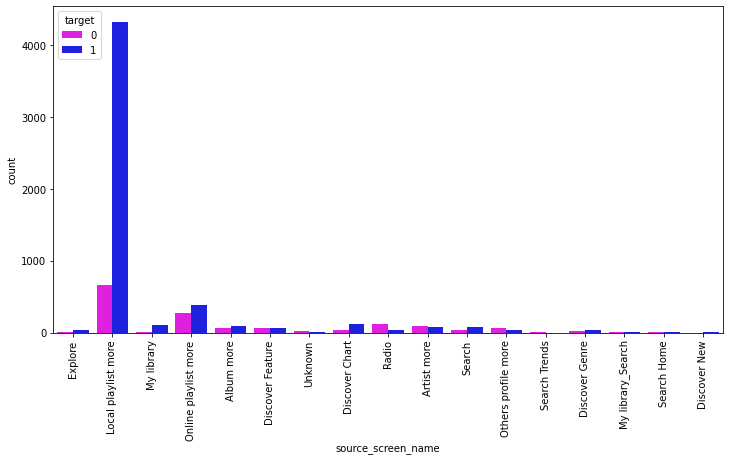

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_screen_name'],palette=['magenta','blue'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

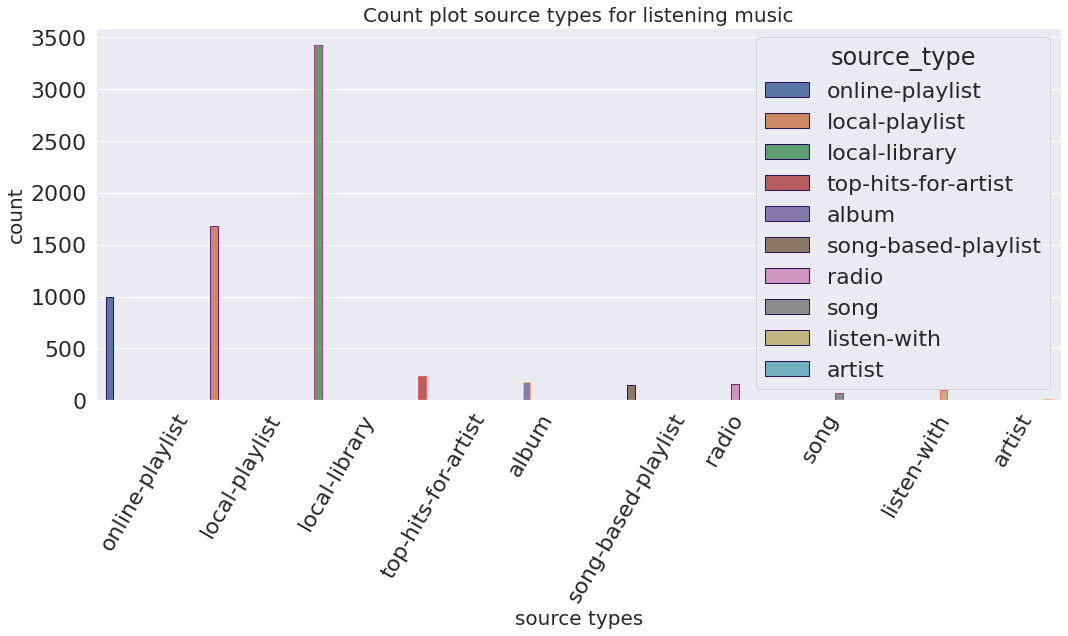

In [ ]:
plt.figure(figsize=(15,9))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=train,edgecolor=sns.color_palette('magma',5))
sns.set(style="ticks")
plt.xlabel('source types',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(rotation='60')
plt.title('Count plot source types for listening music',fontsize=20)
plt.tight_layout()



1)source_system_tab indicates the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions.

2)It can be depicted from the above plot that people repeat songs from their library or discover tabs.

3)From notifications or settings tab people are not interested to repeat songs.



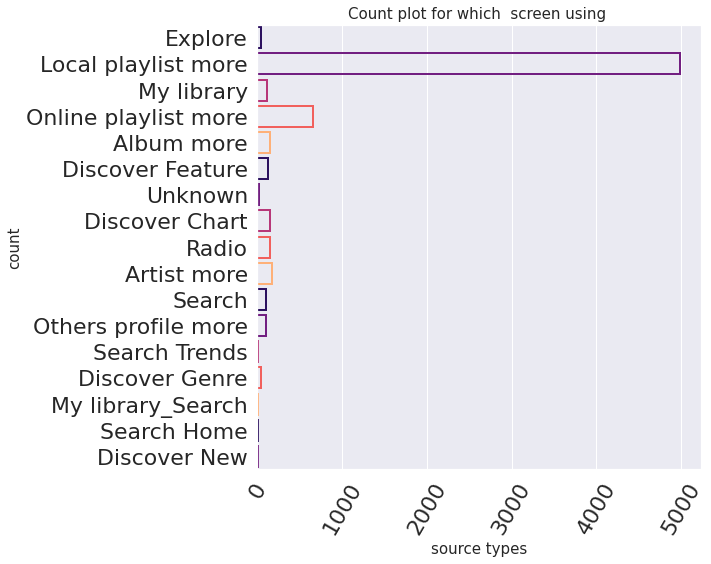

In [ ]:
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.countplot(y='source_screen_name',data=train,facecolor=(0,0,0,0),linewidth=2,edgecolor=sns.color_palette('magma',5))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation='60')
plt.title('Count plot for which  screen using ',fontsize=15)
plt.tight_layout()

In [ ]:
def count_plot(data, x, hue, type):
  plt.figure(figsize = (15, 8))
  sns.set(font_scale = 2)
  sns.countplot(x = x, hue = hue, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('count', fontsize = 30)
  plt.xticks(rotation = '90')
  plt.title('Count plot for {0} in {1} data'.format(x, type), fontsize = 30)
  plt.tight_layout()

**Function to plot histograms for categories**

In [ ]:
def count_plot_function(data, x):
  plt.figure(figsize = (15,10))
  sns.set(font_scale = 2)
  sns.countplot(x = x, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('count', fontsize = 30)
  plt.xticks(rotation = '90')
  plt.title('Count plot', fontsize = 30)
  plt.tight_layout()

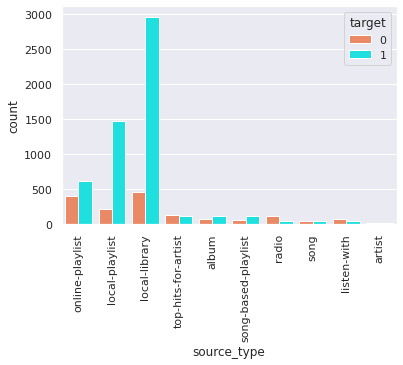

In [ ]:
sns.countplot(x = train['source_type'],palette=['coral','cyan'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

**Visualiaztion in members**

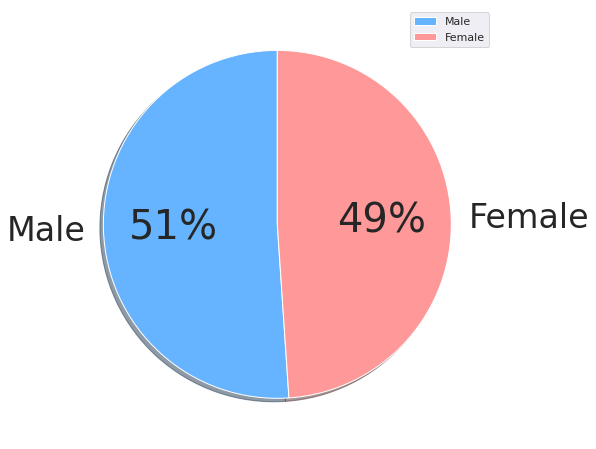

In [ ]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 40.0
labels = ['Male','Female']
colors = ['#66b3ff','#ff9999']
plt.figure(figsize = (8, 8))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels,colors=colors, autopct='%.0f%%',
                                    shadow=True, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

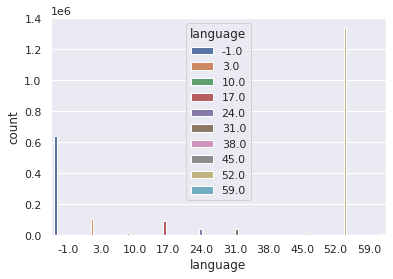

In [ ]:
sns.countplot(x = songs['language'],data =train,hue=songs['language'],orient='v')

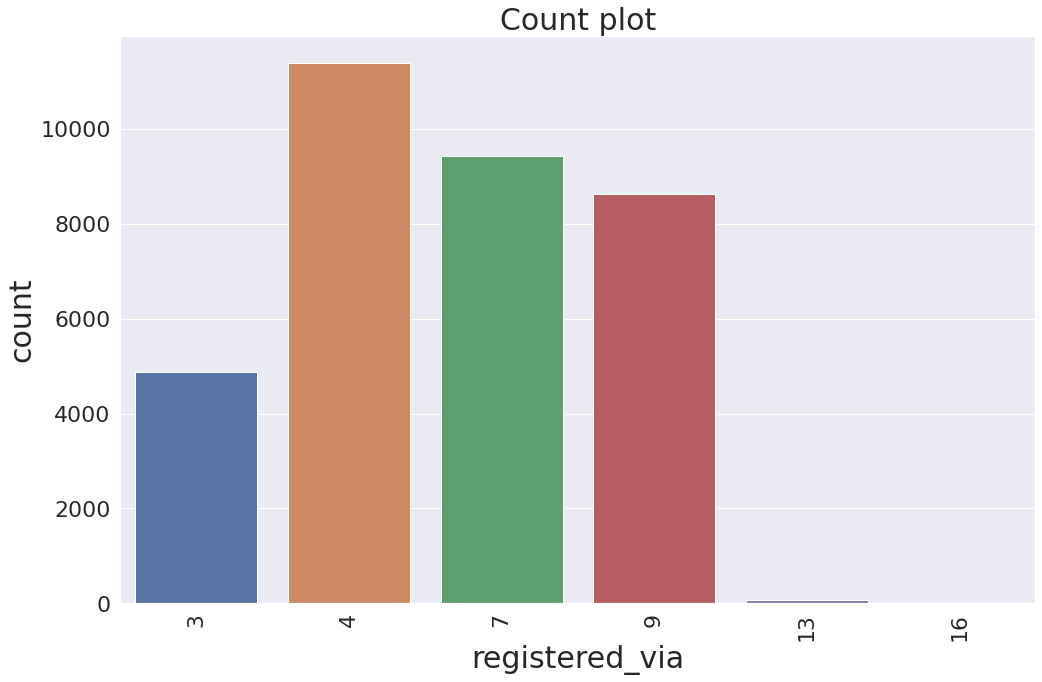

In [ ]:
count_plot_function(members, 'registered_via')



Most of the registrations happened via method '4', '7' and '9'.

Few uses have registered theirselves via '13' and '16' methods.


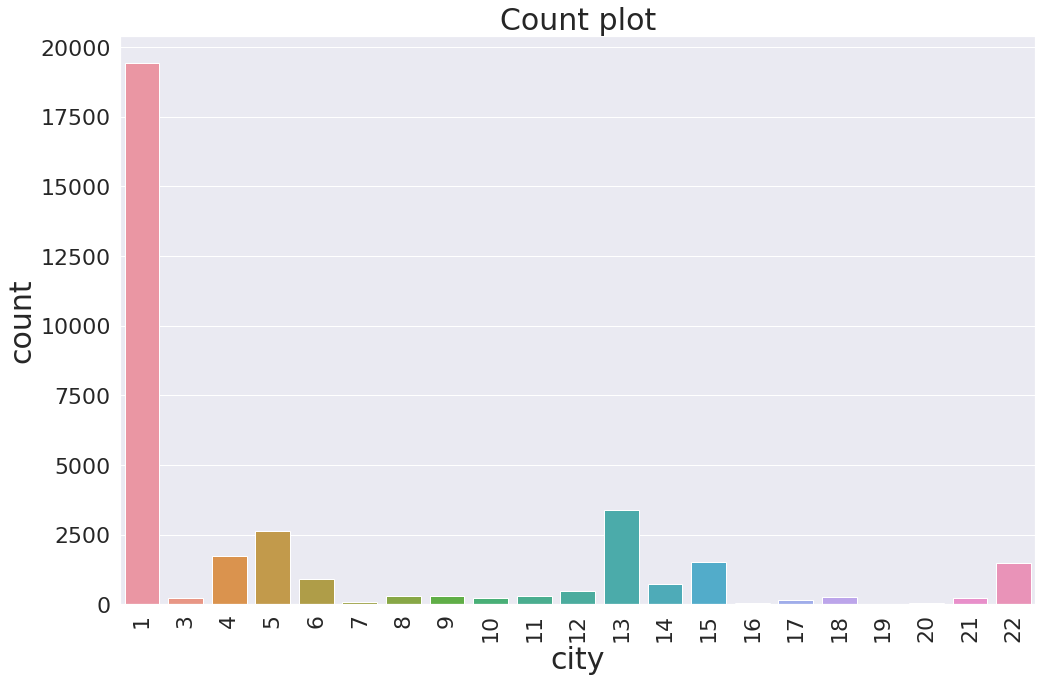

In [ ]:
count_plot_function(members, 'city')



Most of the people who used to listen songs are from '1'- labelled city.

Some cities have very few people who prefer listening music via this music app


**Doing stats test on members**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PDF for Registration')

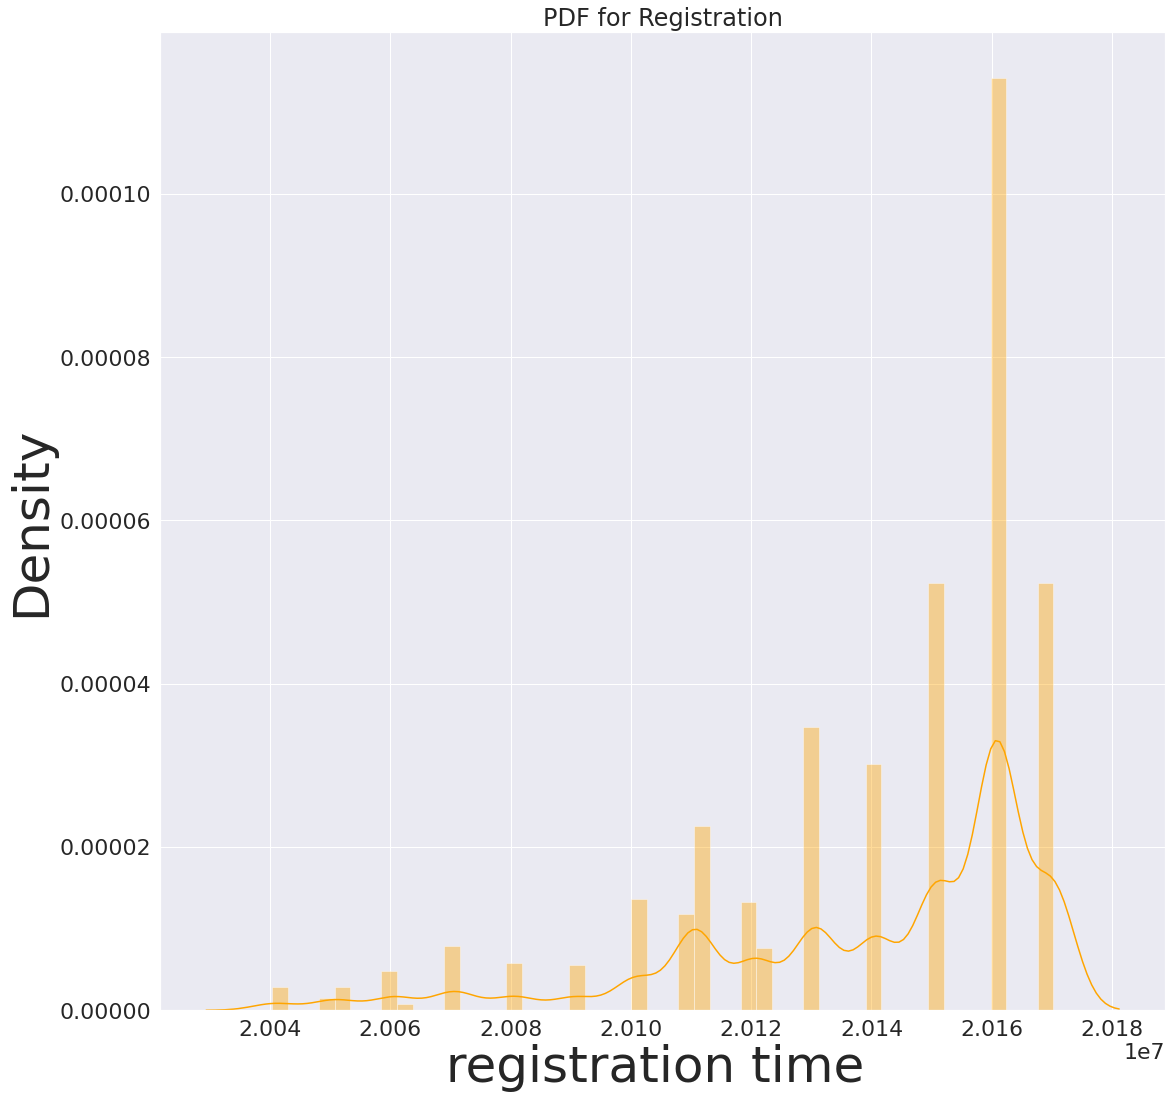

In [ ]:
plt.figure(figsize = (18, 18)) 
sns.distplot(members.registration_init_time,color='orange')
sns.set(font_scale=2)
plt.ylabel('Density',fontsize=50)
plt.xlabel('registration time ' ,fontsize=50)
plt.title('PDF for Registration')

We can see that initially people were not fond of listening music but after certain amount time people started to listen music and registered themselves to this music app

In [ ]:
# Function to plot PDF and CDf.

def plot_pdf_cdf(x, flag):
  plt.figure(figsize = (10, 6)) 
  kwargs = {'cumulative': True}
  if flag:
    sns.distplot(x, hist_kws = kwargs, kde_kws = kwargs,color='purple')
    plt.title('CDF for age')
  else:
    sns.distplot(x,color='purple')
    plt.title('PDF for age')
  sns.set(font_scale=2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


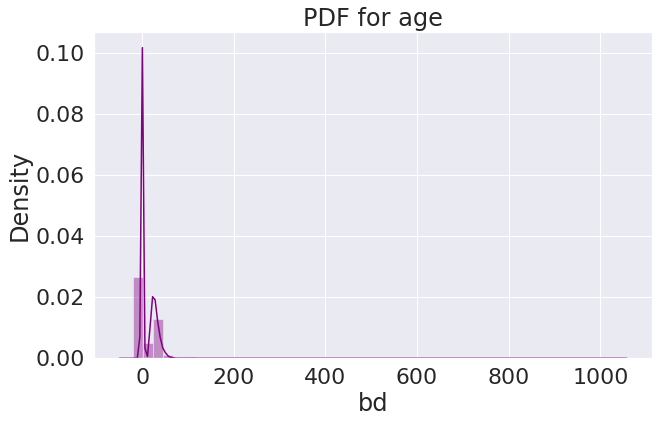

In [ ]:
plot_pdf_cdf(members['bd'], False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


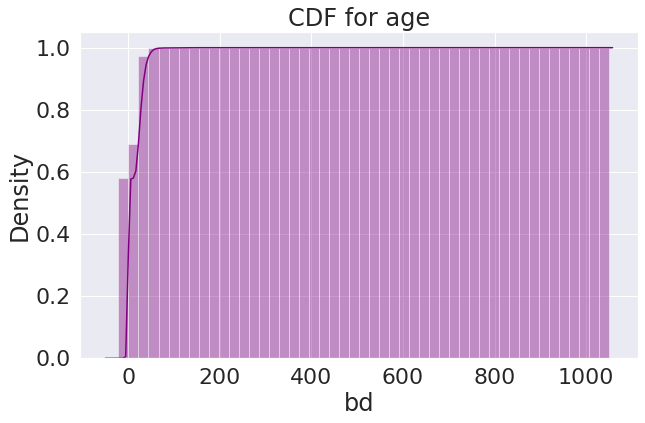

In [ ]:
plot_pdf_cdf(members['bd'], True)
plt.show()

In [ ]:
np.percentile(members['bd'].values, 98)

47.0

1)98th percentile user is of 47 age.
2)Means most of the user are below 50.
3)We can also observe via above CDF that almost 99% values are below 50. 
4)There are also some outliers like 1030, -38, -43, 1051, etc. As age cannot be negative value or more than 1000 for humans



**DATA PREPROCESSING AND CLEANING**

In [ ]:
test = test1.drop(['target'],axis=1)
ytr = np.array(test1['target'])

In [ ]:
test_name = ['id','msno','song_id','source_system_tab',\
             'source_screen_name','source_type']
test['id']=np.arange(nts)
test = test[test_name]

In [ ]:
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

In [ ]:
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

In [ ]:
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

In [ ]:
members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')

In [ ]:
train = train.fillna(-1)
test = test.fillna(-1)

In [ ]:
import gc
del members, songs; gc.collect();

In [ ]:
colm = list(train.columns)
colm.remove('target')

In [ ]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(colm):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|██████████| 19/19 [00:00<00:00, 205.26it/s]


In [ ]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})

train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

In [ ]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y, \
    test_size=0.1, random_state = 12)
    
del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid) 

watchlist = [d_train, d_valid]

**Trying out basic classification models**

In [ ]:
def predict(m1_model):
    model = m1_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_valid)
    #accuracy_score = m1_model.metrics.accuracy_score(y_valid,y_pred)
    #print('Accuracy Score : {}'.format(accuracy_score))
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==ytr).astype(int)
    acc = comp.sum()/comp.size*100
    print("Accuracy on test data for the model", acc)

**Predicting training score & accuracy on test data using**
**LogisticRegression & RandomForestClassifier**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
predict(LogisticRegression())

Training Score : 0.783968253968254
Accuracy on test data for the model 74.9


In [ ]:
predict(RandomForestClassifier())

Training Score : 1.0
Accuracy on test data for the model 78.86666666666666


**Prediction using lightgbm**

In [ ]:
params = {}
params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model1 = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist, \
early_stopping_rounds=10, verbose_eval=10)

Training until validation scores don't improve for 10 rounds.
[10]	training's auc: 0.990763	valid_1's auc: 0.835241
[20]	training's auc: 0.999798	valid_1's auc: 0.843137
[30]	training's auc: 0.999997	valid_1's auc: 0.846132
[40]	training's auc: 1	valid_1's auc: 0.843824
Early stopping, best iteration is:
[33]	training's auc: 1	valid_1's auc: 0.848582


In [ ]:
p_test = model1.predict(X_test)

**Printing accuracy of lgbm model on test data**

In [ ]:
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc))

The accuracy of lgbm model on test data is: 78.533333%
